# Exploratory Data Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D


In [3]:
df=pd.read_csv(r"C:\Users\Hitesh kumar\Downloads\cleaned2_Startup_funding.csv")
df

,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks,Year,amount_category,investor_count
0,2020-01-09,BYJU’S,EdTech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,No Remark,2020,High,1
1,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,3000000.0,No Remark,2020,Medium,1
2,2020-01-02,Fashor,Technology,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,1800000.0,No Remark,2020,Medium,1
3,2020-01-13,Shuttl,Technology,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,No Remark,2020,Medium,1
4,2020-01-09,Mamaearth,Technology,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,No Remark,2020,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2015-04-11,Zomato,Technology,Unknown,Gurgaon,Info Edge (India),Private Equity,25000000.0,Late Stage,2015,High,1
2869,2015-04-10,iMMi Life,Technology,Unknown,Chennai,Unitus Seed Fund,Seed Funding,1529113.0,No Remark,2015,Medium,1
2870,2015-04-28,Urban Ladder,Home Decor,Unknown,Bangalore,"Anand Rajaraman, Venky Harinarayan",Private Equity,25795550.0,Series D,2015,High,2
2871,2015-04-28,Babajobs,Technology,Unknown,Bangalore,SEEK Ltd & affiliates,Private Equity,10000000.0,Series B,2015,Medium,1


## Plot bar charts of startup count per city and industry 

### Graph

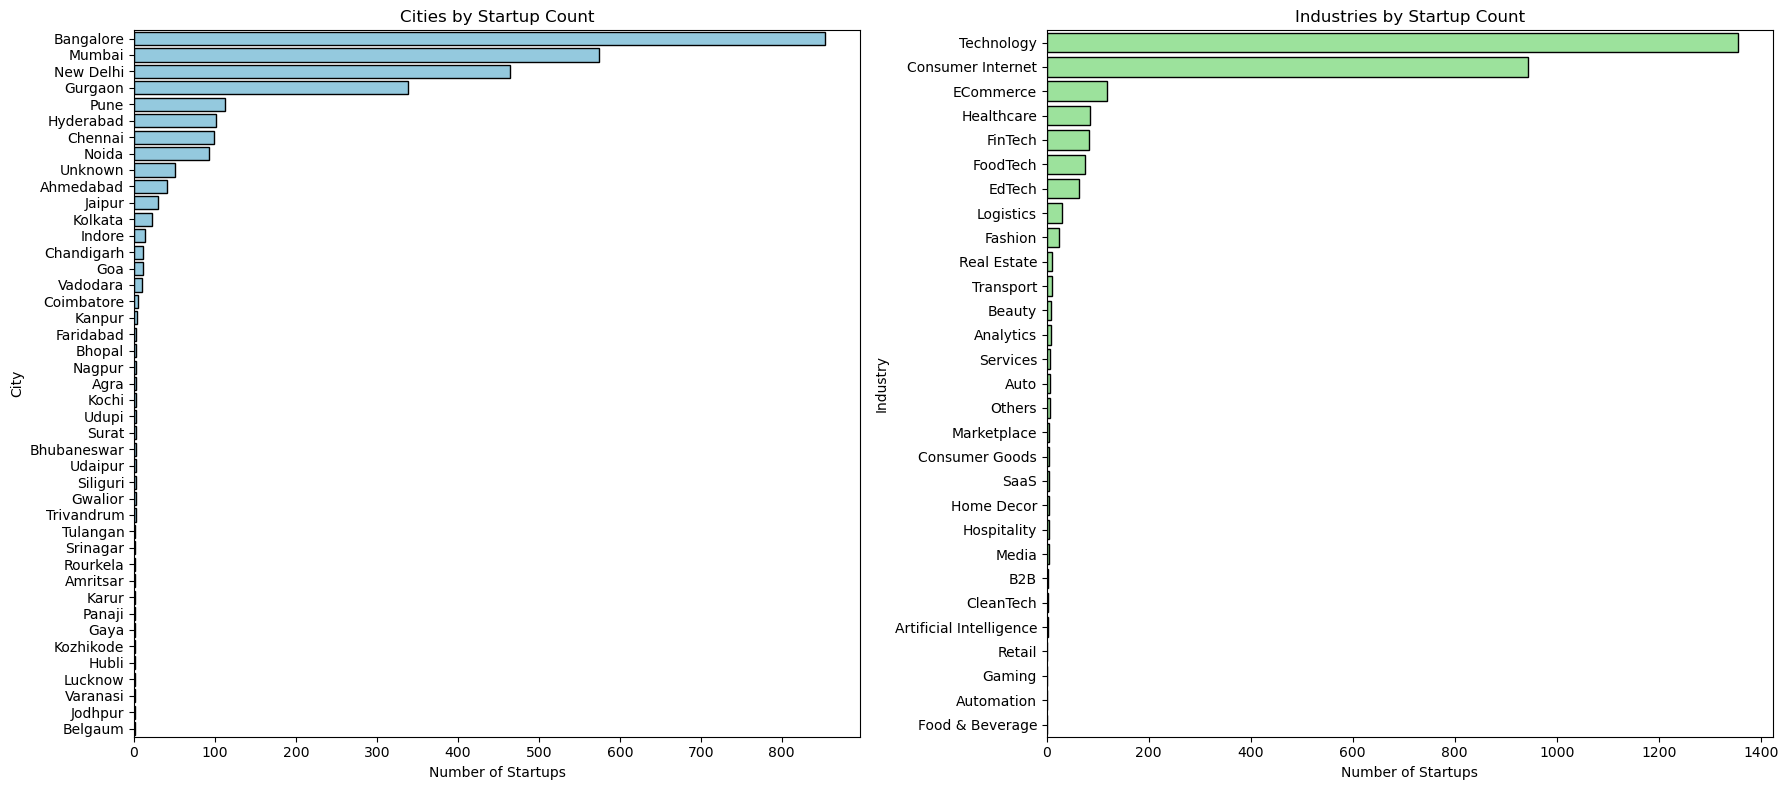

In [4]:
# Plot
plt.figure(figsize=(18, 8))

# City
plt.subplot(1, 2, 1)                            #Creates the first subplot in a 1-row, 2-column layout (1, 2, 1 means: 1st subplot).
top_cities = df['City_Location'].value_counts() #value_counts() returns a sorted Series with cities and their startup counts.
sns.barplot(x=top_cities.values, y=top_cities.index,color='skyblue',edgecolor='black') #horizontal bar chart
plt.title('Cities by Startup Count')
plt.xlabel('Number of Startups')
plt.ylabel('City')

# Industry
plt.subplot(1, 2, 2)
top_industries = df['Industry_Vertical'].value_counts()
sns.barplot(x=top_industries.values, y=top_industries.index,color='lightgreen',edgecolor='black')
plt.title('Industries by Startup Count')
plt.xlabel('Number of Startups')
plt.ylabel('Industry')

plt.tight_layout()  # adjusts spacing between plots so labels and titles don’t overlap.
plt.show()

### Insights

Cities by Startup Count: 
- Bangalore leads as India's startup capital, driven by tech talent, VCs, and innovation hubs.
- Mumbai, Delhi, and Gurgaon follow — strong in fintech, e-commerce, and corporate-backed ventures.
- Hyderabad, Pune, and Chennai are emerging ecosystems with growing infrastructure and state support.
- Tier 2/3 cities show limited but rising activity, signaling future growth potential.

Industries by Startup Count:
- E-commerce, Fintech, and Tech dominate, fueled by India’s digital adoption.
- Healthcare and Ed-tech surged post-COVID, reflecting innovation in remote services.
- Transport, FoodTech, and Business Services highlight urban demand and gig economy trends.

## Line chart of total funding amount per year (trendline)

### Graph

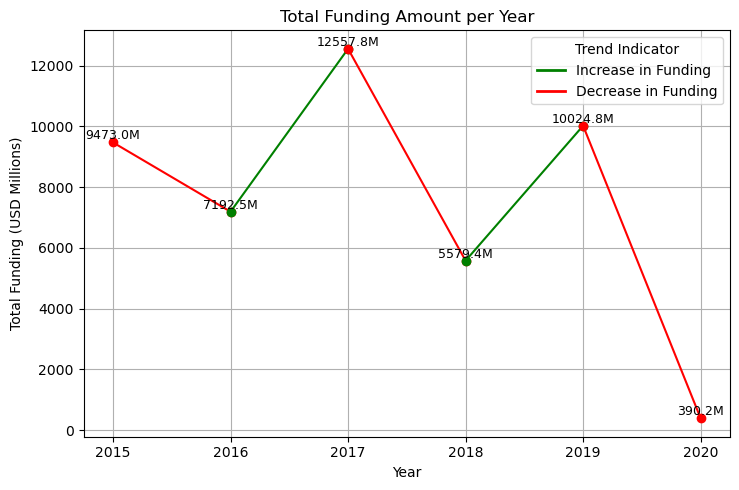

In [5]:
# Prepare data
funding_per_year = df.groupby('Year')['Amount_USD'].sum().reset_index()
funding_per_year['Amount_Millions'] = funding_per_year['Amount_USD'] / 1_000_000

years = funding_per_year['Year'].values
amounts = funding_per_year['Amount_Millions'].values

# Plot
plt.figure(figsize=(7.5, 5))
plt.title('Total Funding Amount per Year')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD Millions)')
plt.grid(True)

# Plot each segment in red or green
for i in range(1, len(years)):
    x_vals = [years[i-1], years[i]]
    y_vals = [amounts[i-1], amounts[i]]
    color = 'green' if amounts[i] >= amounts[i-1] else 'red'
    plt.plot(x_vals, y_vals, marker='o', color=color)

# Annotate points
for i in range(len(years)):
    plt.text(x=years[i],y=amounts[i],s=f'{amounts[i]:.1f}M',ha='center',va='bottom',fontsize=9,color='black')

# Custom legend
legend_elements = [
    Line2D([0], [0], color='green', lw=2, label='Increase in Funding'),
    Line2D([0], [0], color='red', lw=2, label='Decrease in Funding')
]
plt.legend(handles=legend_elements, loc='upper right', title='Trend Indicator', frameon=True)
plt.tight_layout()
plt.show()

### Insights

Total Funding Trend (2015–2020)

Growth Years
- Reflect positive momentum in the startup ecosystem
- Rise of high-growth sectors (fintech, edtech, SaaS)
- Policy support (e.g., Startup India)
- Entry of international investors

Decline Years
- Indicate caution or correction phases
- Market corrections or overvaluation concerns
- Economic slowdown, investor hesitation
- Pandemic-related disruptions

## Box plots comparing funding amounts across cities

### Graph

C:\Users\Hitesh kumar\AppData\Local\Temp\ipykernel_10028\1297450475.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_cities, x='City_Location', y='Amount_USD', palette='coolwarm')


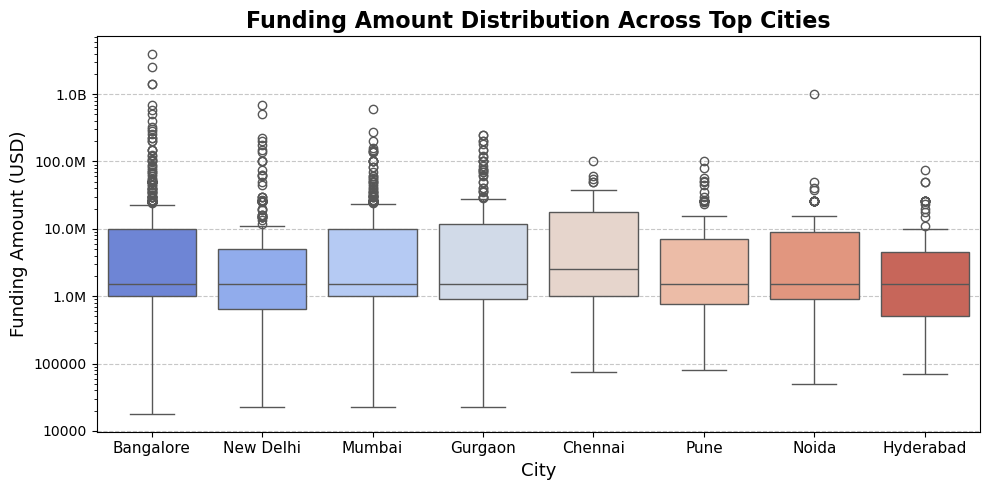

In [6]:
top_cities_list = df['City_Location'].value_counts().head(8).index
df_top_cities = df[df['City_Location'].isin(top_cities_list)]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_top_cities, x='City_Location', y='Amount_USD', palette='coolwarm')

# Use log scale for y-axis to handle outliers
plt.yscale('log')
plt.xticks( fontsize=11)

plt.title('Funding Amount Distribution Across Top Cities', fontsize=16, weight='bold')
plt.xlabel('City', fontsize=13)
plt.ylabel('Funding Amount (USD)', fontsize=13)

# Format y-axis ticks to show human-friendly labels in millions or billions
def millions_billions(x, pos):
    if x >= 1_000_000_000:
        return f'{x*1e-9:.1f}B'  # Billions
    elif x >= 1_000_000:
        return f'{x*1e-6:.1f}M'  # Millions
    else:
        return f'{int(x)}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_billions))

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Insights

City-wise Funding Insights:

- Bangalore: Top-funded with frequent large deals. Home to unicorns like Flipkart & Ola; backed by global VCs.
- Delhi NCR: High variation due to mega-deals. Base for Zomato, OYO, and strong in B2B/logistics.
- Mumbai: Stable mid-size funding. Fintech and media dominate; backed by corporate VCs.
- Pune, Hyderabad, Chennai: Consistent but smaller rounds. Known for SaaS (Pune), deep tech (Hyderabad), and B2B efficiency (Chennai).

## Pie chart of investment types distribution

### Graph

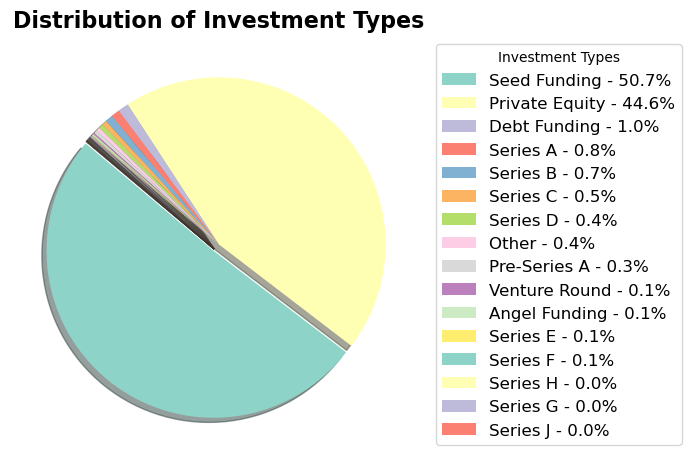

In [7]:
investment_counts = df['Investment_Type'].value_counts()
total = investment_counts.sum()
percentages = 100 * investment_counts / total

plt.figure(figsize=(7, 7))

# Color palette
colors = sns.color_palette('Set3')[0:len(investment_counts)]

# Explode first slice slightly for emphasis
explode = [0.05] + [0] * (len(investment_counts) - 1)

# Pie chart without percentages on slices
wedges, texts = plt.pie(
    investment_counts,
    labels=None,  # No labels on slices
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True
)

# Build legend labels with percentage values
legend_labels = [f'{label} - {percent:.1f}%' for label, percent in zip(investment_counts.index, percentages)]

# Add title with bold font
plt.title('Distribution of Investment Types', fontsize=16, weight='bold')

# Legend with percentages
plt.legend(
    wedges,
    legend_labels,
    title='Investment Types',
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()


### Insights

Investment Type Insights:

- Seed Funding (50.7%): Most common; reflects early-stage boom post-2015, backed by Startup India.
- Private Equity (44.6%): Strong late-stage interest; big rounds for startups like Flipkart, BYJU’S, Paytm.
- Debt (1.0%): Used by fintechs and capital-heavy models for efficient growth.
- Others (~3%): Few startups reached Series A–H; shows early-stage drop-off or pivots.

## Word cloud of most frequent investor names 

### Graph

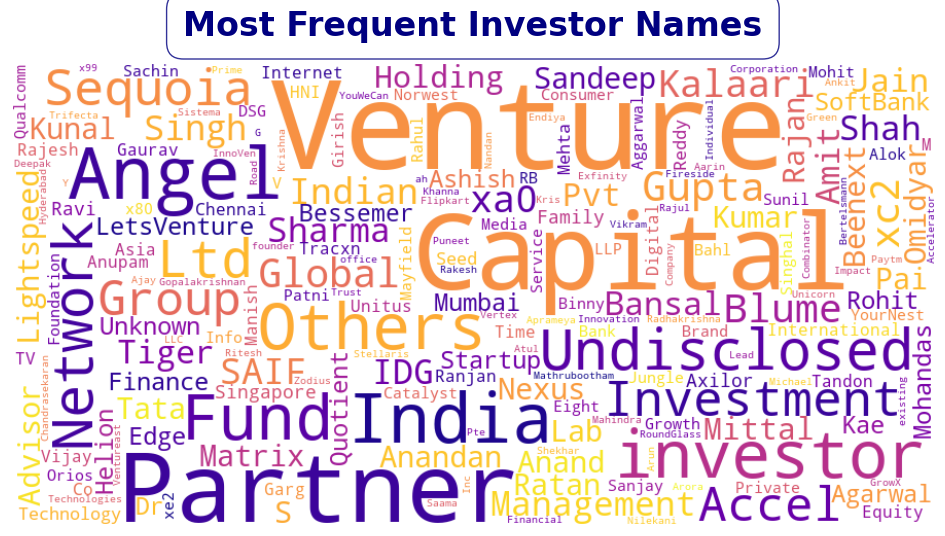

In [11]:
# Combine all investor names into one string
investor_text = ' '.join(df['Investors_Name'].dropna().astype(str))

# Generate word cloud with refined styling
wordcloud = WordCloud(
    width=900,
    height=450,
    background_color='white',
    colormap='plasma',      # smooth, vibrant colors
    contour_color='steelblue',
    contour_width=1.5,
    max_font_size=120,
    min_font_size=10,
    random_state=42,
    collocations=False      # avoid duplicate words
).generate(investor_text)

# Plotting
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Title with a shadow effect for better visibility
plt.title('Most Frequent Investor Names', fontsize=24, fontweight='bold', color='navy', pad=20,
          bbox=dict(facecolor='white', alpha=0.8, edgecolor='navy', boxstyle='round,pad=0.5'))

plt.tight_layout(pad=3)
plt.show()


### Insights

Key Startup Investors (2015–2020):

- Global VCs Dominate: Sequoia, Accel, Tiger Global, SoftBank led major deals (Flipkart, BYJU’S, Swiggy).
- Rise of Indian Angels & Micro-VCs: Blume, Kalaari, Sanjay Mehta supported early-stage growth post-Startup India.
- Corporate Giants Join In: Google, Facebook, Reliance made strategic moves — e.g., Facebook’s 2020 investment in Jio.

## Count plot of startups per funding round (Seed, Series A, etc.) 

### Graph

C:\Users\Hitesh kumar\AppData\Local\Temp\ipykernel_10028\614527904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Investment_Type'].isin(top_types.index)],y='Investment_Type', order=top_types.index, palette='coolwarm')


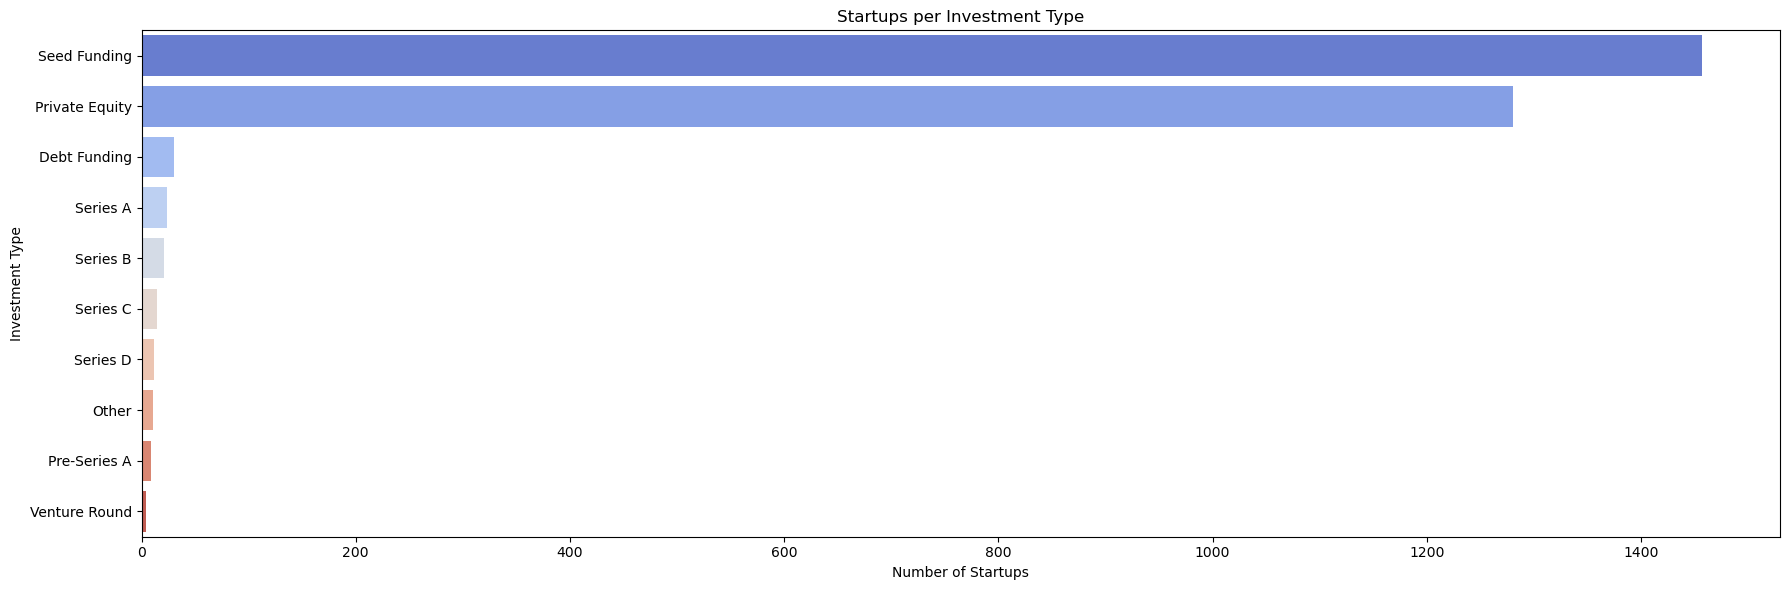

In [9]:
plt.figure(figsize=(18, 6))
top_types = df['Investment_Type'].value_counts().head(10)
sns.countplot(data=df[df['Investment_Type'].isin(top_types.index)],y='Investment_Type', order=top_types.index, palette='coolwarm')
plt.title("Startups per Investment Type")
plt.xlabel("Number of Startups")
plt.ylabel("Investment Type")
plt.tight_layout()
plt.show()

### Insights

Startups by Investment Type:

- Seed Funding leads: Most startups got early-stage backing, driven by angel investors, accelerators, and Startup India schemes.
- Private Equity: Marks India’s shift toward mature, high-growth ventures.
- Other Types (Series A–H, Angel, etc.): Fewer in number, showing many startups struggle to scale beyond seed stage.

## Correlation analysis between funding amount and number of investors 

### Graph

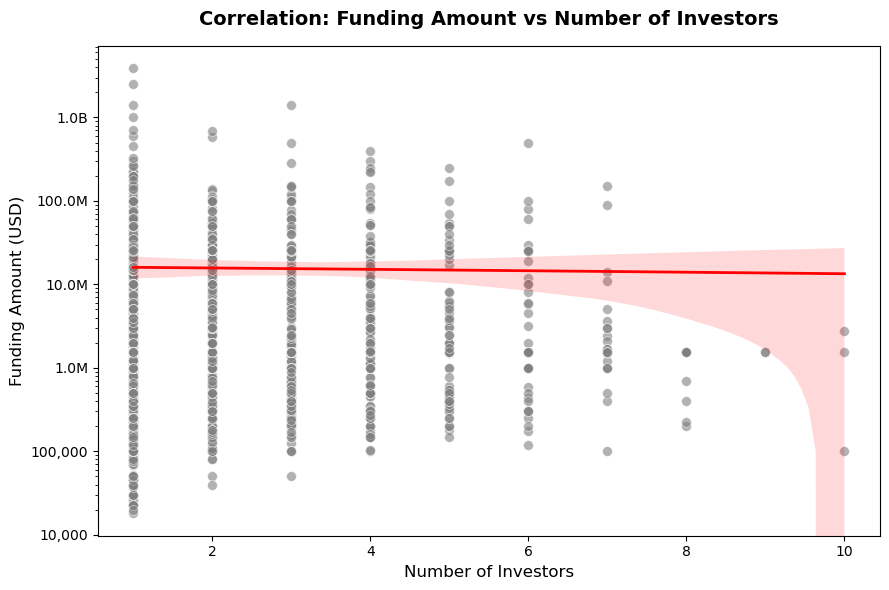

In [10]:
# Filter out non-positive funding amounts (log scale can't handle 0 or negative)
df_filtered = df[df['Amount_USD'] > 0].copy()

plt.figure(figsize=(9, 6))

# Scatterplot
sns.scatterplot(data=df_filtered,x='investor_count',y='Amount_USD',alpha=0.6,s=50,color='grey')

# Regression line
sns.regplot(data=df_filtered,x='investor_count',y='Amount_USD',scatter=False,color='red',line_kws={'linewidth': 2}
)

# Log scale on y-axis
plt.yscale('log')

# Human-friendly y-axis tick labels (e.g., 1M, 1B)
def format_large_ticks(x, pos):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    else:
        return f'{x:,.0f}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_large_ticks))

# Titles and axis labels
plt.title('Correlation: Funding Amount vs Number of Investors', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Number of Investors', fontsize=12)
plt.ylabel('Funding Amount (USD)', fontsize=12)

plt.tight_layout()
plt.show()


### Insights

Funding Amount vs Number of Investors:

- Positive Correlation: More investors usually mean higher funding—typical in Series B+ rounds.
- Early-Stage Cluster: Most deals have 1–3 investors with modest funding (Seed/Angel stage).
- High Outliers: Mega-deals (e.g., Flipkart, BYJU’S) show high funding with 5+ investors.
